In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def gs_crit_full(df):
    overfit = np.abs(df.best_train_auc-df.best_val_auc) + np.abs(df.best_train_auc-df.best_test_auc) + \
              np.abs(df.best_train_auc-df.best_test_intra_auc)
    best_perf = 1-df.best_train_auc + 1-df.best_val_auc + 1-df.best_test_intra_auc + \
                1-df.best_test_auc
    
    return overfit + 2*best_perf

def gs_crit_best(df):
    overfit = np.abs(df.best_train_auc-df.best_val_auc)
    best_perf = 1-df.best_val_auc
    
    return overfit + 2*best_perf

def gs_crit_final(df):
    overfit = np.abs(df.train_auc-df.val_auc)
    final_perf = 1-df.val_auc
    
    return overfit + 2*final_perf

# gs link with test and test_intra

In [24]:
cing_bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step1/3gs_cing_schiz/bdd_cing_schiz.csv", index_col=0)
cing_bdd['region'] = 'cingulate'
sor_bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2/S.or./bdd_Sor_both.csv", index_col=0)
sor_bdd['region'] = 'S.or.'
sts_bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2/S.T.s./bdd_STs_both.csv", index_col=0)
sts_bdd['region'] = 'S.T.s.'
peric_bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2/pericalcarine/bdd_pericalcarine.csv", index_col=0)
peric_bdd['region'] = 'pericalcarine'

full_bdd = pd.concat([cing_bdd, sor_bdd, sts_bdd, peric_bdd], axis=0)
full_bdd

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,backbone_output_size,converter_activation,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,train_loss,region
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.602849,0.622661,0.584491,0.623615,0.602626,0.636590,0.555044,0.640856,32.0,relu,0.058311,4.0,0.009101,5,sigmoid,0.258506,1.339087,cingulate
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.899369,0.581289,0.492751,0.532635,0.731134,0.667360,0.532619,0.544027,10.0,relu,0.040136,4.0,0.001487,5,relu,0.447041,1.052452,cingulate
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.985310,0.521830,0.548928,0.557882,0.728284,0.635759,0.578828,0.639470,4.0,linear,0.131287,10.0,0.000103,3,relu,0.149783,1.045123,cingulate
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.585417,0.553430,0.564482,0.644397,0.582487,0.644075,0.597101,0.672414,10.0,relu,0.091070,4.0,0.076253,4,relu,0.233524,1.345705,cingulate
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.994285,0.579210,0.509363,0.575739,0.637104,0.655717,0.569918,0.615764,32.0,sigmoid,0.125742,-1.0,0.000859,0,linear,0.170546,0.774936,cingulate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.994891,0.523909,0.484446,0.564963,0.639062,0.653638,0.536545,0.644089,NaN,NaN,0.068369,NaN,0.000132,3,NaN,0.078913,0.959505,pericalcarine
56,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.998752,0.548857,0.573543,0.490148,0.574804,0.639501,0.525823,0.523707,NaN,NaN,0.011512,NaN,0.000420,3,NaN,0.090321,0.553608,pericalcarine
57,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.521686,0.522661,0.528013,0.526016,0.517078,0.606237,0.532317,0.498153,NaN,NaN,0.041992,NaN,0.079448,8,NaN,0.144264,1.911267,pericalcarine
58,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.477146,0.468607,0.469496,0.500616,0.548944,0.672765,0.543340,0.606527,NaN,NaN,0.014478,NaN,0.002084,9,NaN,0.036086,1.356889,pericalcarine


In [25]:
full_bdd['gs_crit_best'] = gs_crit_best(full_bdd)
full_bdd['gs_crit_final'] = gs_crit_final(full_bdd)

full_bdd

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,backbone_output_size,...,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,train_loss,region,gs_crit_best,gs_crit_final
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.602849,0.622661,0.584491,0.623615,0.602626,0.636590,0.555044,0.640856,32.0,...,0.058311,4.0,0.009101,5,sigmoid,0.258506,1.339087,cingulate,0.760783,0.774490
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.899369,0.581289,0.492751,0.532635,0.731134,0.667360,0.532619,0.544027,10.0,...,0.040136,4.0,0.001487,5,relu,0.447041,1.052452,cingulate,0.729055,1.155502
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.985310,0.521830,0.548928,0.557882,0.728284,0.635759,0.578828,0.639470,4.0,...,0.131287,10.0,0.000103,3,relu,0.149783,1.045123,cingulate,0.821008,1.419822
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.585417,0.553430,0.564482,0.644397,0.582487,0.644075,0.597101,0.672414,10.0,...,0.091070,4.0,0.076253,4,relu,0.233524,1.345705,cingulate,0.773438,0.925126
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.994285,0.579210,0.509363,0.575739,0.637104,0.655717,0.569918,0.615764,32.0,...,0.125742,-1.0,0.000859,0,linear,0.170546,0.774936,cingulate,0.707179,1.256655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.994891,0.523909,0.484446,0.564963,0.639062,0.653638,0.536545,0.644089,NaN,...,0.068369,NaN,0.000132,3,NaN,0.078913,0.959505,pericalcarine,0.707300,1.423166
56,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.998752,0.548857,0.573543,0.490148,0.574804,0.639501,0.525823,0.523707,NaN,...,0.011512,NaN,0.000420,3,NaN,0.090321,0.553608,pericalcarine,0.785695,1.352182
57,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.521686,0.522661,0.528013,0.526016,0.517078,0.606237,0.532317,0.498153,NaN,...,0.041992,NaN,0.079448,8,NaN,0.144264,1.911267,pericalcarine,0.876685,0.955653
58,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.477146,0.468607,0.469496,0.500616,0.548944,0.672765,0.543340,0.606527,NaN,...,0.014478,NaN,0.002084,9,NaN,0.036086,1.356889,pericalcarine,0.778291,1.071325


In [26]:
# get the models such as their gs criterion is better at the end than at the pick val_auc value
print(full_bdd[full_bdd.gs_crit_best > full_bdd.gs_crit_final].count().model_path)
full_bdd[full_bdd.gs_crit_best > full_bdd.gs_crit_final]

17


,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,backbone_output_size,...,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,train_loss,region,gs_crit_best,gs_crit_final
6,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.572999,0.606029,0.490335,0.583436,0.486007,0.623701,0.486937,0.529249,10.0,...,0.066368,4.0,0.022615,2,sigmoid,0.384026,1.339654,cingulate,0.890292,0.820972
28,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.626520,0.663617,0.530504,0.600985,0.616904,0.662370,0.536696,0.578202,10.0,...,0.049989,4.0,0.002405,0,sigmoid,0.444243,1.330095,cingulate,0.720725,0.709862
53,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.612292,0.621206,0.583736,0.622845,0.596201,0.624116,0.584944,0.578818,32.0,...,0.046987,4.0,0.003674,4,sigmoid,0.149915,1.351658,cingulate,0.779682,0.766502
62,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.500000,0.589578,0.517048,0.626321,0.564347,32.0,...,0.118947,32.0,0.033255,5,relu,0.079131,1.342983,cingulate,1.038435,1.000000
89,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.602754,0.606237,0.562821,0.600985,0.424758,0.642412,0.413621,0.450739,32.0,...,0.168524,10.0,0.001353,4,sigmoid,0.153929,1.332538,cingulate,0.932831,0.791009
93,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.531334,0.602495,0.487315,0.556650,0.489015,0.577963,0.477877,0.456897,10.0,...,0.121816,10.0,0.070674,4,relu,0.115748,1.493549,cingulate,0.933022,0.866171
99,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.562548,0.627443,0.473950,0.525554,0.560189,0.582744,0.553534,0.636392,32.0,...,0.047494,32.0,0.019411,6,sigmoid,0.043580,1.358612,cingulate,0.857066,0.810009
122,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.605624,0.619543,0.610541,0.614532,0.602426,0.608732,0.616883,0.603448,32.0,...,0.148264,4.0,0.000465,5,sigmoid,0.167260,1.336136,cingulate,0.788843,0.774833
125,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.602365,0.616008,0.552930,0.622691,0.599691,0.618087,0.556705,0.620690,32.0,...,0.175907,4.0,0.005414,3,sigmoid,0.068931,1.352233,cingulate,0.782222,0.781626
134,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.578178,0.587526,0.521444,0.572352,0.584883,0.572141,0.543567,0.575431,32.0,...,0.083976,4.0,0.023339,3,sigmoid,0.177996,1.338744,cingulate,0.868459,0.834296


<Axes: xlabel='gs_crit_best', ylabel='best_test_auc'>

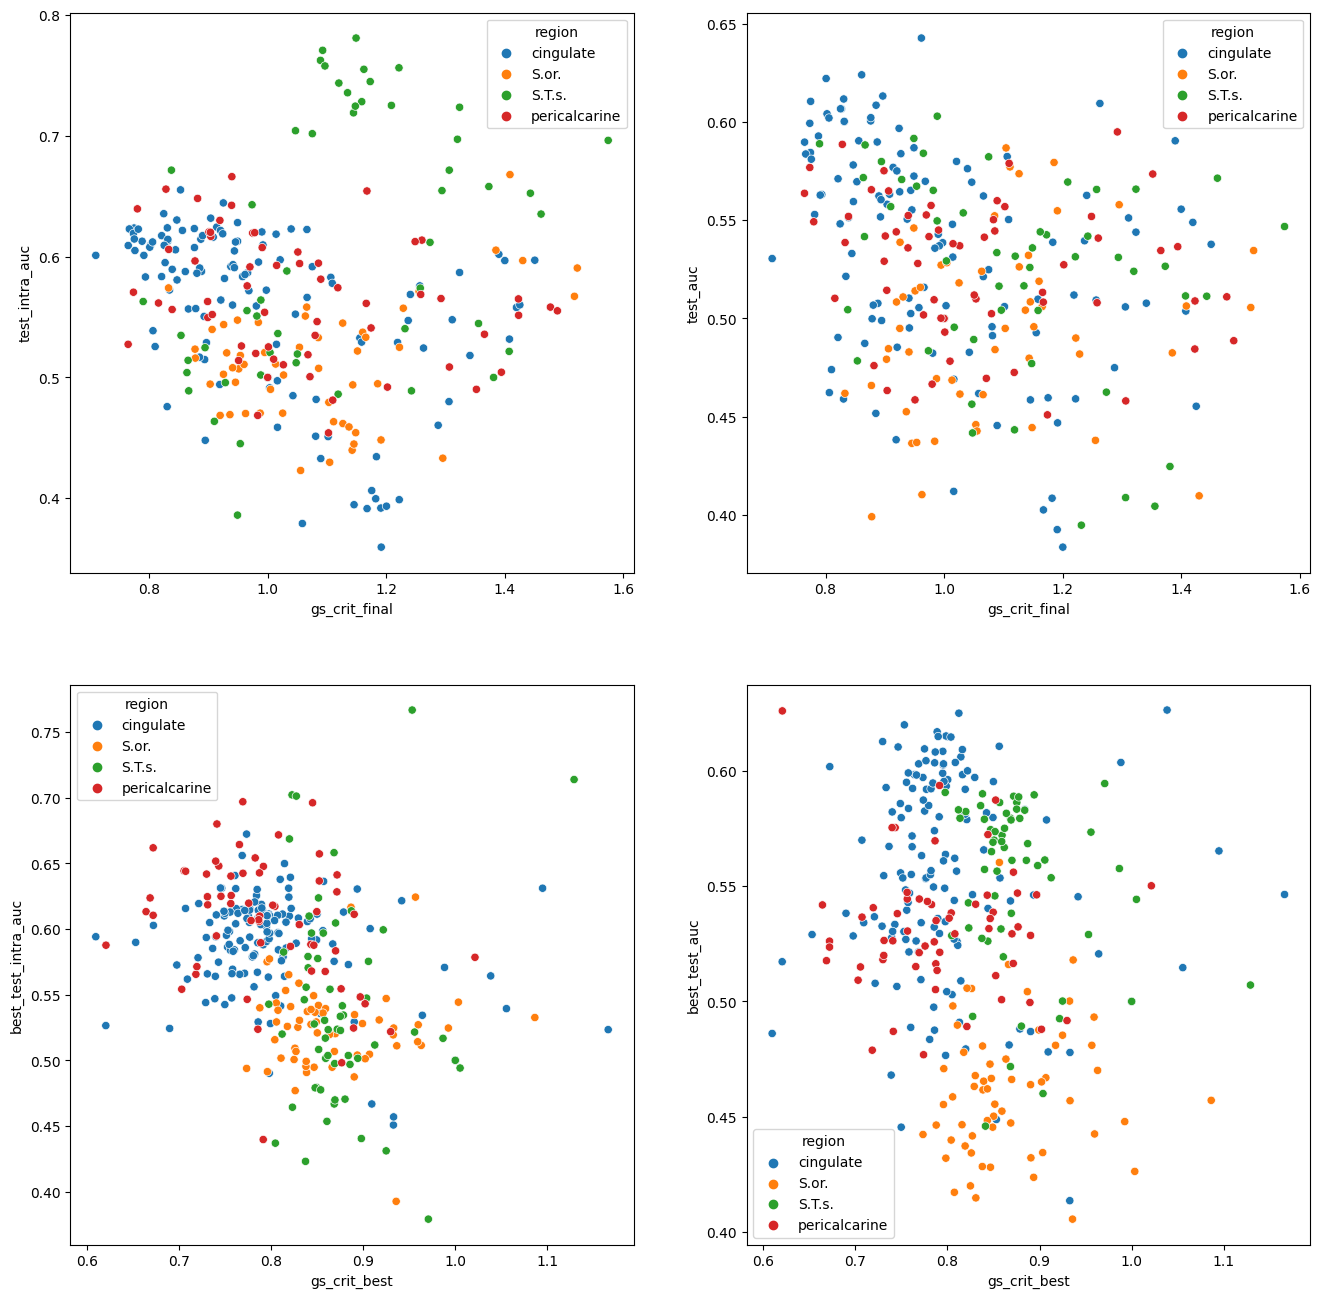

In [39]:
# gs and tests auc scatterplot

plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
sns.scatterplot(full_bdd, x="gs_crit_final", y="test_intra_auc", hue='region')
plt.subplot(2,2,2)
sns.scatterplot(full_bdd, x="gs_crit_final", y="test_auc", hue='region')
plt.subplot(2,2,3)
sns.scatterplot(full_bdd, x="gs_crit_best", y="best_test_intra_auc", hue='region')
plt.subplot(2,2,4)
sns.scatterplot(full_bdd, x="gs_crit_best", y="best_test_auc", hue='region')

In [55]:
def gs_test_aucs_barplot(df, title=None):

    plt.figure(figsize=(16,16))

    df.loc[:,'interval_best'] = pd.qcut(df.gs_crit_best, q=10)
    df.loc[:,'interval_final'] = pd.qcut(df.gs_crit_final, q=10)

    plt.subplot(2,2,1)
    plt.xticks(rotation = 90)
    sns.barplot(df, x="interval_final", y="test_intra_auc")

    plt.subplot(2,2,2)
    plt.xticks(rotation = 90)
    sns.barplot(df, x="interval_final", y="test_auc")

    plt.subplot(2,2,3)
    plt.xticks(rotation = 90)
    sns.barplot(df, x="interval_best", y="best_test_intra_auc")

    plt.subplot(2,2,4)
    plt.xticks(rotation = 90)
    sns.barplot(df, x="interval_best", y="best_test_auc")

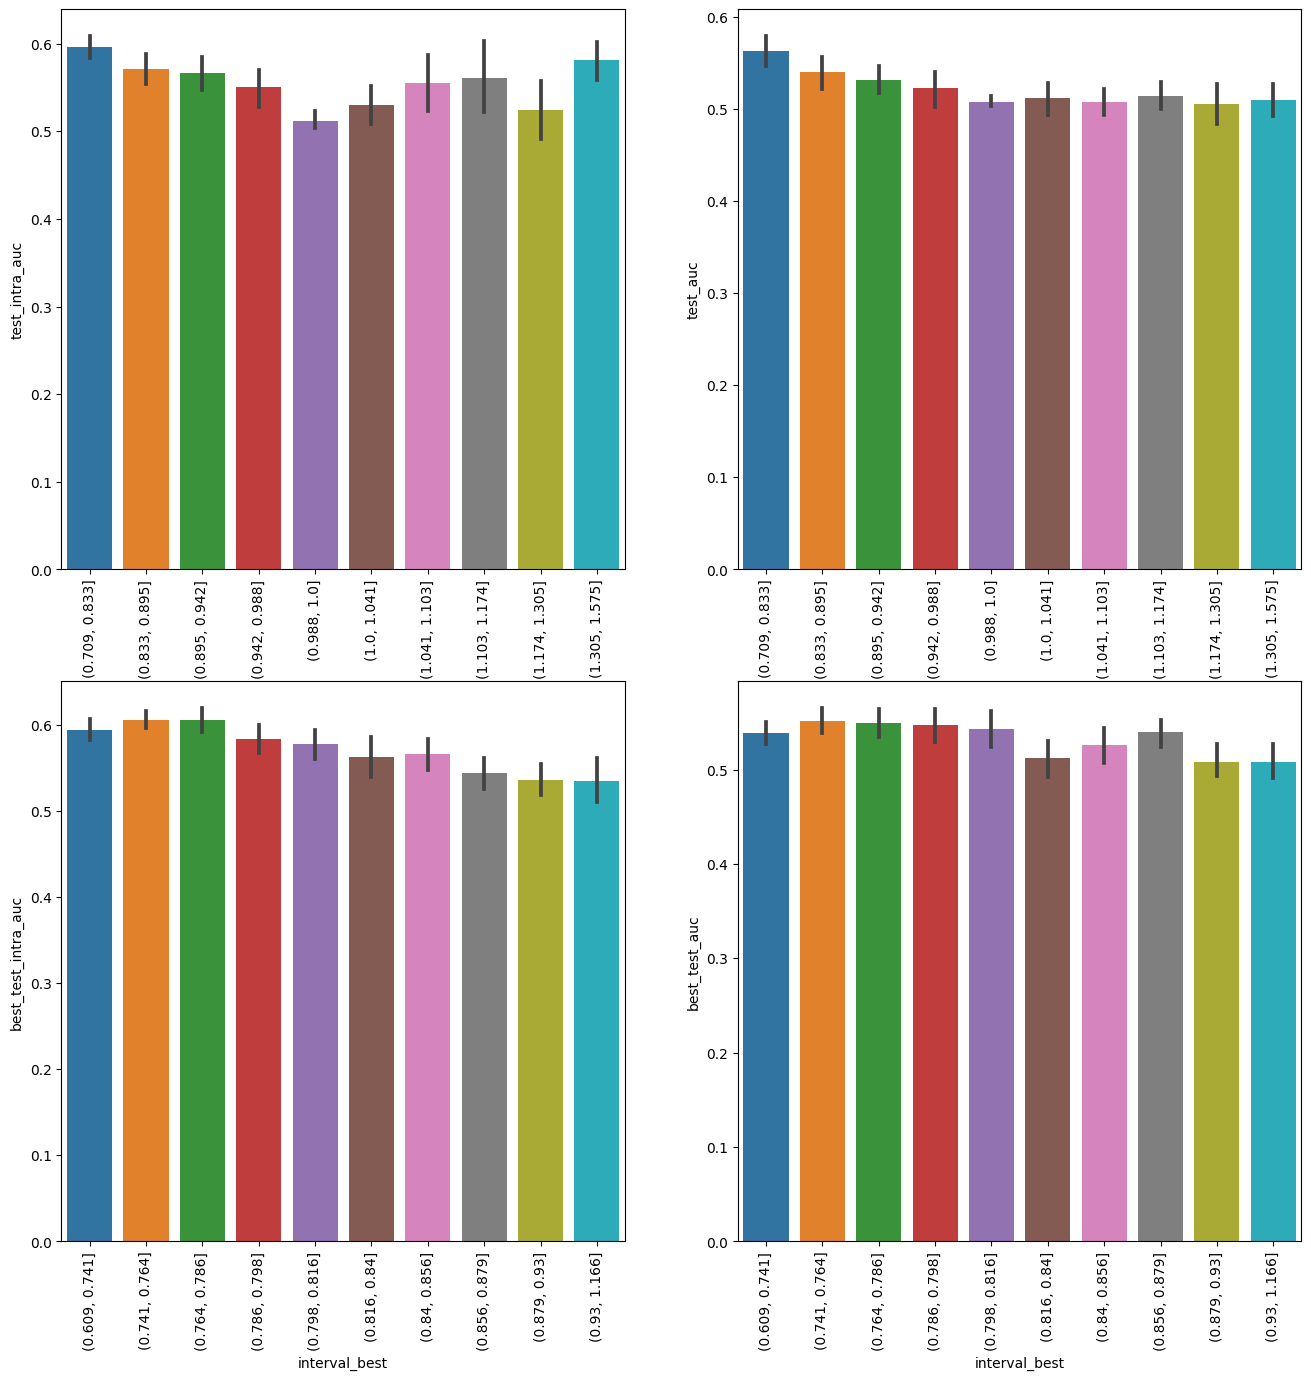

In [56]:
gs_test_aucs_barplot(full_bdd)

cingulate


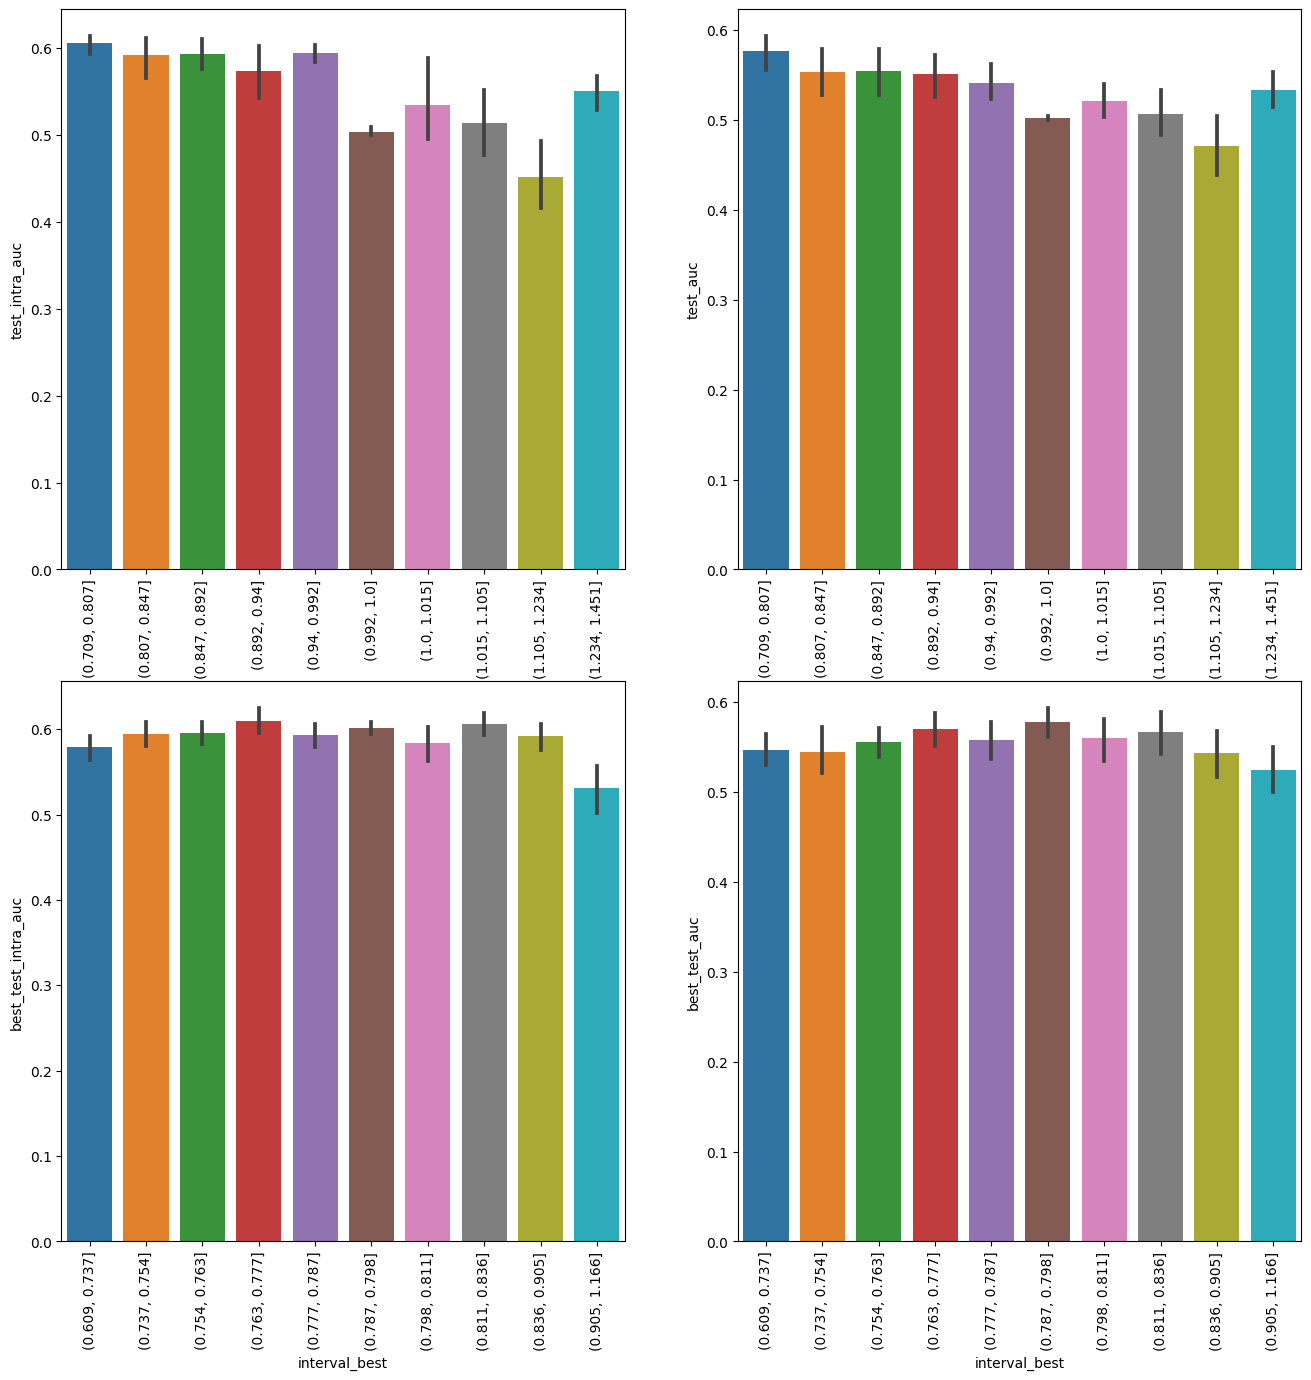

S.or.


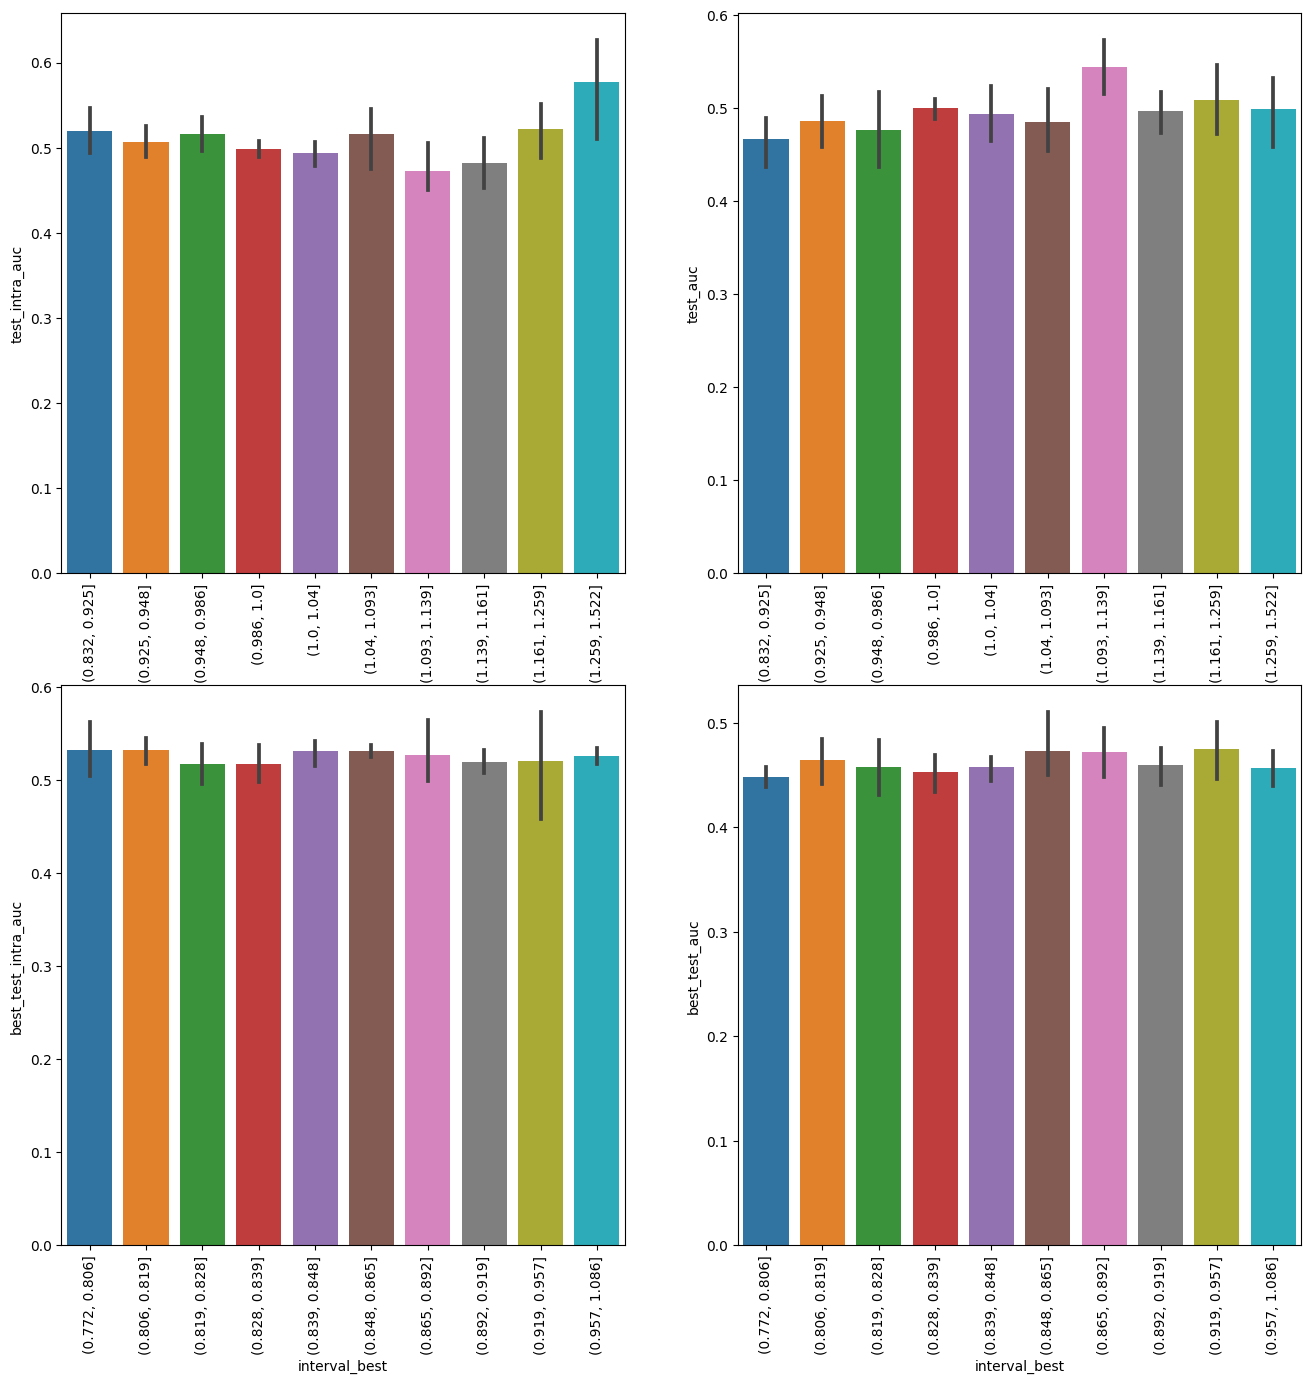

S.T.s.


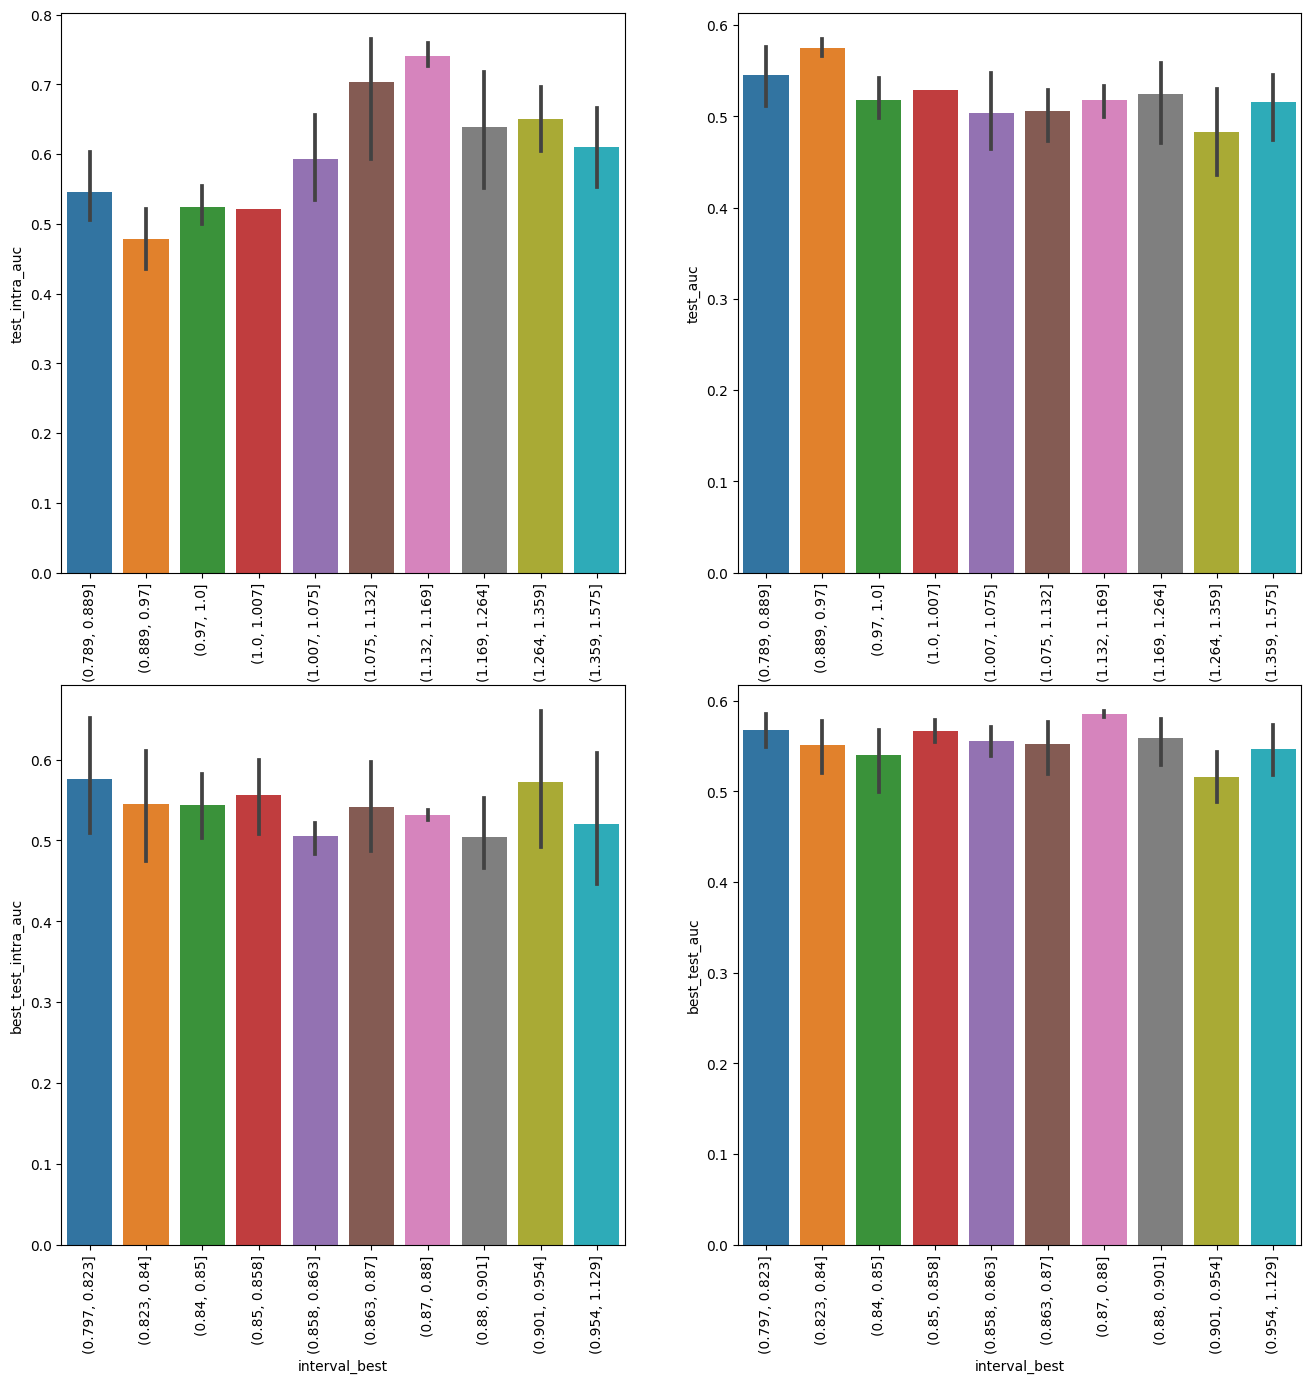

pericalcarine


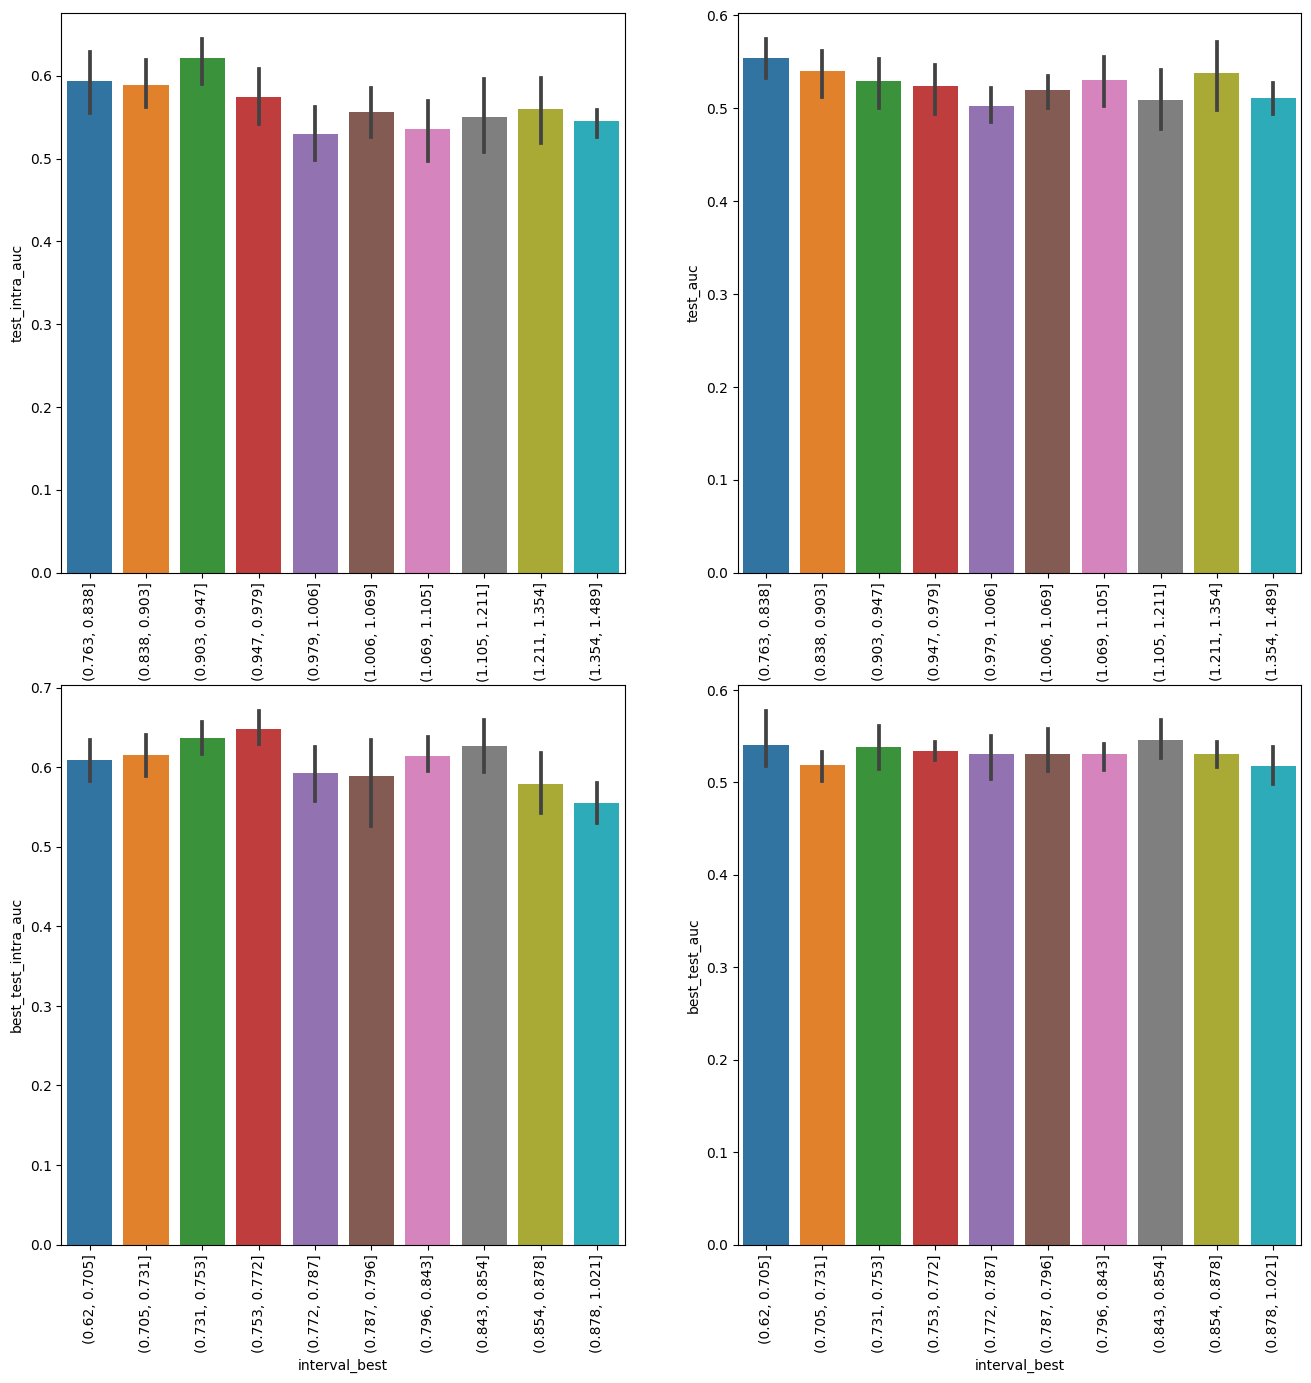

In [58]:
# for each region individually

regions = ['cingulate', 'S.or.', 'S.T.s.', 'pericalcarine']

for region in regions:
    print(region)
    gs_test_aucs_barplot(full_bdd[full_bdd.region == region])
    plt.show()